In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns

In [2]:
wine1=pd.read_csv('/Users/ranmo/Desktop/数据分析案例/Wine Reviews/wine-reviews/winemag-data_first150k.csv')
wine2=pd.read_csv('/Users/ranmo/Desktop/数据分析案例/Wine Reviews/wine-reviews/winemag-data-130k-v2.csv')
#两个表的数据类型是一致的，合并两个表
wine=pd.concat([wine1,wine2],ignore_index=True,sort=False)
wine=wine.drop(labels='Unnamed: 0',axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
country                  280833 non-null object
description              280901 non-null object
designation              197701 non-null object
points                   280901 non-null int64
price                    258210 non-null float64
province                 280833 non-null object
region_1                 234594 non-null object
region_2                 111464 non-null object
variety                  280900 non-null object
winery                   280901 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [3]:
wine.shape

(280901, 13)

In [4]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'taster_name',
       'taster_twitter_handle', 'title'],
      dtype='object')

In [27]:
wine

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,NaN,NaN,NaN
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,NaN,NaN,NaN
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,NaN,NaN,NaN
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,NaN,NaN,NaN


In [5]:
wine.duplicated().value_counts()

False    217839
True      63062
dtype: int64

In [6]:
wine=wine.drop_duplicates()

In [7]:
(wine[['country','description','designation','province','points','price']].duplicated()).value_counts()

False    169518
True      48321
dtype: int64

In [8]:
wine[['country','description','designation','province','points','price']].duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
280871    False
280872    False
280873    False
280874    False
280875    False
280876    False
280877    False
280878    False
280879    False
280880    False
280881    False
280882    False
280883    False
280884    False
280885    False
280886    False
280887    False
280888    False
280889    False
280890    False
280891    False
280892    False
280893    False
280894    False
280895    False
280896    False
280897    False
280898    False
280899    False
280900    False
Length: 217839, dtype: b

In [9]:
dupilicated_index=list(wine[wine[['country','description','designation','province','points','price']].duplicated()].index)
wine=wine.drop(labels=dupilicated_index,axis=0)
wine.reset_index(drop=True)


,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,NaN,NaN,NaN
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,NaN,NaN,NaN
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,NaN,NaN,NaN
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,NaN,NaN,NaN


In [10]:
wine.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,NaN,NaN,NaN
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,NaN,NaN,NaN
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,NaN,NaN,NaN
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,NaN,NaN,NaN


In [11]:
(wine[['designation']].duplicated()).value_counts()

True     122278
False     47240
dtype: int64

In [12]:
wine.describe()

,points,price
count,169518.000000,156687.000000
mean,88.243962,34.677880
std,3.145574,39.941199
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


In [13]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [14]:
temp=wine.variety.value_counts()[0:15]


Text(0, 0.5, 'Quantity')

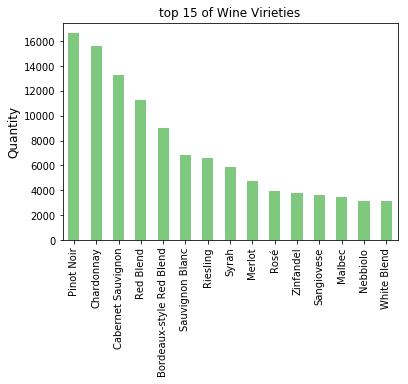

In [157]:
ax=temp.plot(kind='bar',title='top 15 of Wine Virieties',colormap='Accent')
plt.ylabel('Quantity',fontsize=12)

/Users/ranmo/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


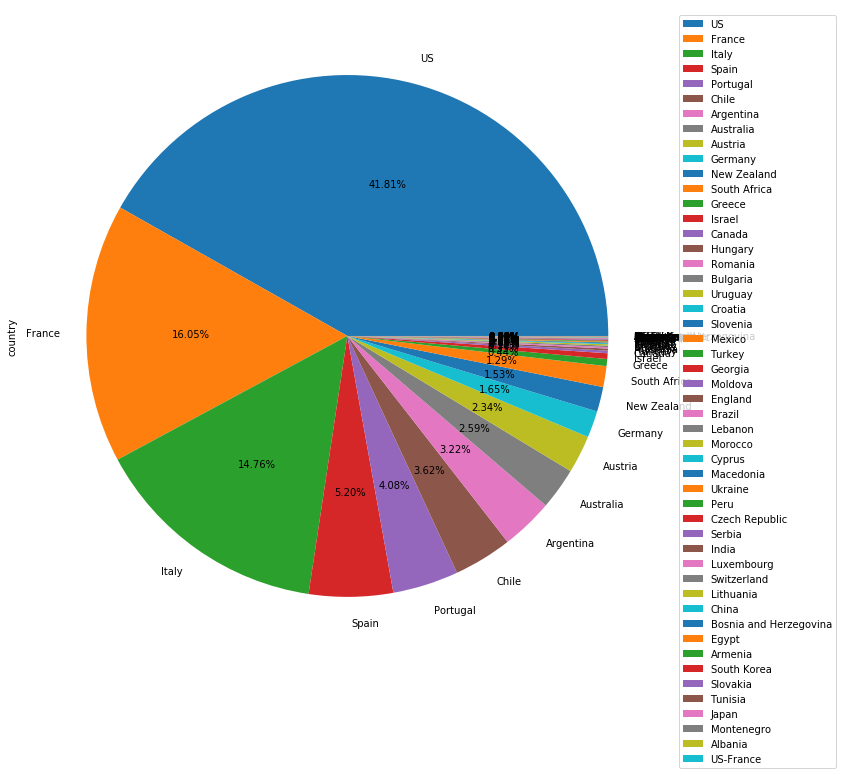

In [15]:
temp=wine.country.value_counts()
temp.plot(kind='pie',autopct='%.2f%%',figsize=(12,12))
plt.legend(bbox_to_anchor=(1,1))  #将图例设置在图片外

In [470]:
temp=wine.groupby(['country','variety']).variety.count()
temp=temp.to_frame()
temp.columns=['quantity']
#组内排序（国家内部种类排序）
temp['rank_variety']=temp.quantity
temp['rank_variety']=temp.groupby(by='country').rank_variety.apply(lambda x:x.rank(method='min',ascending=False))
# 国家排序
temp1=temp.groupby(by=['country']).quantity.sum().rank(method='min',ascending=False).sort_values()
temp1=temp1.to_frame()
temp1.columns=['rank_country']
#联结两个表
temp2=pd.merge(temp,temp1,on='country',right_index=True)
#返回每个国家前五的种类
temp3=temp2.sort_values(by=['rank_country','rank_variety'])
temp3[temp3.rank_variety<6]


quantity  rank_variety  \
country                variety                                                 
US                     Pinot Noir                        12303           1.0   
                       Cabernet Sauvignon                 9983           2.0   
                       Chardonnay                         8862           3.0   
                       Syrah                              4478           4.0   
                       Red Blend                          3797           5.0   
                       Zinfandel                          3797           5.0   
France                 Bordeaux-style Red Blend           6168           1.0   
                       Chardonnay                         3484           2.0   
                       Pinot Noir                         2425           3.0   
                       Rosé                               2014           4.0   
                       Champagne Blend                    1608           5.0   
Italy                  Red Blend                          4280           1.0   
                       Nebbiolo                           3056           2.0   
                       Sangiovese                         3028           3.0   
                       Corvina, Rondinella, Molinara      1263           4.0   
                       Sangiovese Grosso                  1087           5.0   
Spain                  Tempranillo                        2032           1.0   
                       Red Blend                          1080           2.0   
                       Tempranillo Blend                   808           3.0   
                       Sparkling Blend                     625           4.0   
                       Albariño                            476           5.0   
Portugal               Portuguese Red                     2903           1.0   
                       Portuguese White                   1313           2.0   
                       Port                                969           3.0   
                       Rosé                                257           4.0   
                       Touriga Nacional                    224           5.0   
Chile                  Cabernet Sauvignon                 1122           1.0   
                       Sauvignon Blanc                     884           2.0   
                       Chardonnay                          751           3.0   
                       Carmenère                           742           4.0   
...                                                        ...           ...   
India                  Cabernet Sauvignon                    1           4.0   
Luxembourg             Pinot Gris                            2           1.0   
                       Riesling                              2           1.0   
                       Sparkling Blend                       2           1.0   
                       Auxerrois                             1           4.0   
                       White Blend                           1           4.0   
Switzerland            Merlot                                2           1.0   
                       Pinot Noir                            2           1.0   
                       Chasselas                             1           3.0   
                       Pinot Noir-Gamay                      1           3.0   
                       White Blend                           1           3.0   
Lithuania              Sparkling Blend                       4           1.0   
Bosnia and Herzegovina Blatina                               2           1.0   
China                  Cabernet Blend                        1           1.0   
                       Chardonnay                            1           1.0   
                       White Blend                           1           1.0   
Egypt                  Chenin Blanc                          1           1.0   
                       Grenache                       

count    169518.000000
mean         88.243962
std           3.145574
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

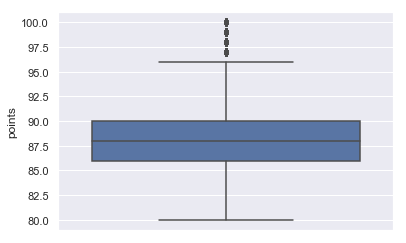

In [484]:
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()

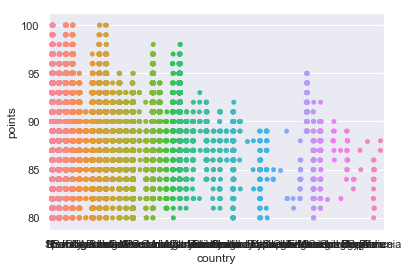

In [486]:
sns.stripplot(x='country',y='points',data=wine)

In [642]:
#确定十五个国家
temp=wine.country.value_counts()[0:15]

#形成新表收藏十五个国家的数据
country_15=temp1=wine
for i in list(wine.index):
    if country_15=temp1.loc[i].country not in list(temp.index):
        country_15=temp1=country_15=temp1.drop(labels=i)



,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title,num
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN,9983.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN,223.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN,2937.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN,12303.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN,55.0
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,NaN,NaN,NaN,223.0
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,NaN,NaN,NaN,223.0
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN,223.0
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,NaN,NaN,NaN,12303.0
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,NaN,NaN,NaN,12303.0


In [643]:
country_15=temp1

TypeError: hlines() missing 2 required positional arguments: 'xmin' and 'xmax'

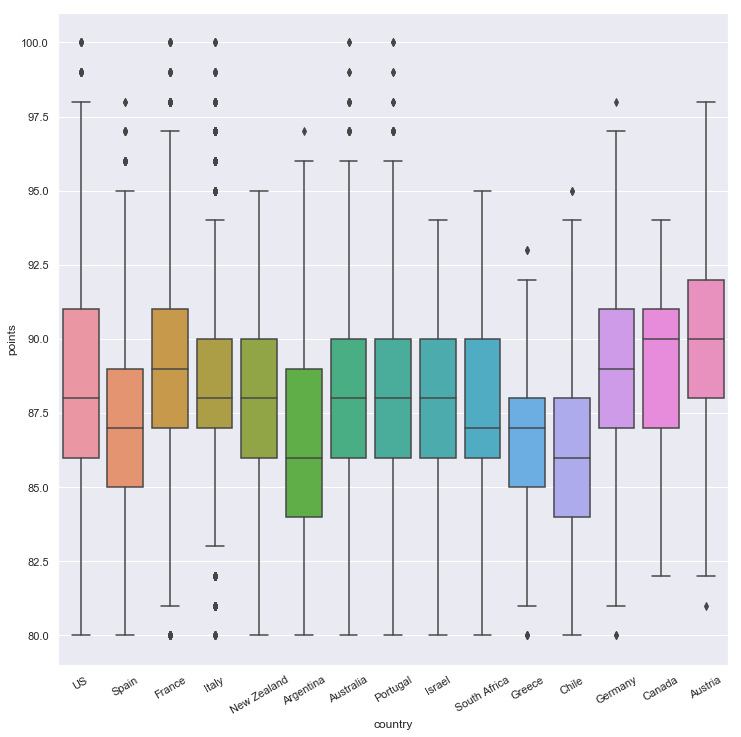

In [596]:
plt.figure(figsize=(12,12))
sns.boxplot(x='country',y='points',data=temp1)
plt.xticks(rotation=30)

#想在箱图中加一条平均值的直线，但是不知道怎么加！！

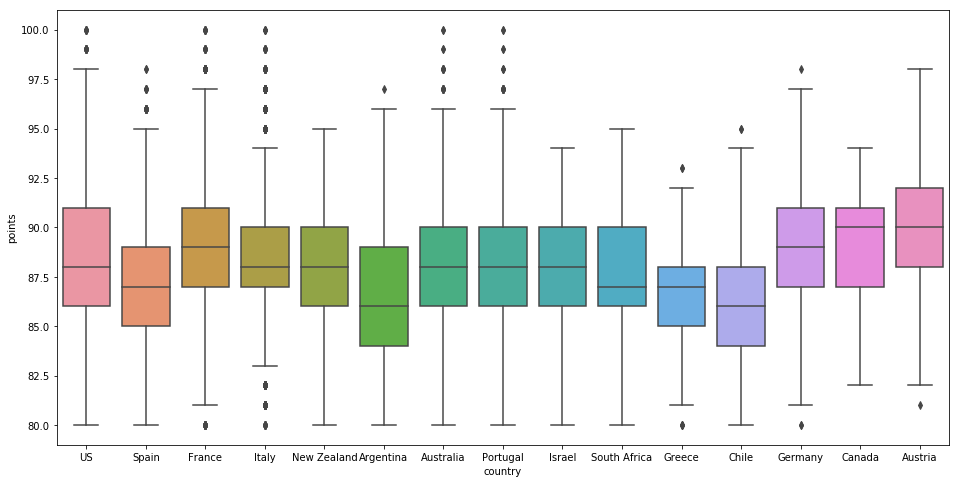

In [17]:
countryList=list(wine.groupby('country').size().sort_values(ascending=False)[0:15].index.values)
df_topcity=wine[wine.country.isin(countryList)]
plt.figure(figsize=(16,8))
sns.boxplot(x='country',y='points',data=df_topcity)


In [706]:

temp=wine.country.value_counts()[0:15]
#创建新表记录15个国家的四个档位分布情况
country_points=pd.DataFrame(np.zeros((15,5)),columns=[['bad','normal','good','excellent','total']],index=list(temp.index))
for i in range(167940):
    if country_15.points[i]<86:
        countryname=country_15.country[i]
        country_points.loc[countryname].bad+=1
        country_points.loc[countryname].total+=1
    if (country_15.points[i]>=86) & (country_15.points[i]<88.5):
        countryname=country_15.country[i]
        country_points.loc[countryname].normal+=1
        country_points.loc[countryname].total+=1
    if (country_15.points[i]>=88.5) & (country_15.points[i]<90):
        countryname=country_15.country[i]
        country_points.loc[countryname].good+=1
        country_points.loc[countryname].total+=1
    if country_15.points[i]>=90:
        countryname=country_15.country[i]
        country_points.loc[countryname].excellent+=1
        country_points.loc[countryname].total+=1
        


In [707]:
#转化成百分率
country_points_new=country_points
country_points_new.bad=country_points_new.bad.values/country_points_new.total.values
country_points_new.normal=country_points_new.normal.values/country_points_new.total.values
country_points_new.good=country_points_new.good.values/country_points_new.total.values
country_points_new.excellent=country_points_new.excellent.values/country_points_new.total.values

country_points_new=country_points_new.drop(label='total',axis=1)
#要花堆积图必须进行层级索引的转换
country_points_new.columns=pd.MultiIndex.from_product([['Ratio'],['bad','normal','good','excellent']])
country_points_new.plot(y='Ratio',kind='bar',figsize=(10,6),stacked=True)

In [726]:
country_points_new.columns=pd.MultiIndex.from_product([['Ratio'],['bad','normal','good','excellent']])


In [728]:
country_points_new

Ratio                              
                   bad    normal      good excellent
US            0.204877  0.333799  0.077099  0.384225
France        0.152650  0.325672  0.096679  0.424999
Italy         0.113137  0.439194  0.107900  0.339770
Spain         0.317450  0.372022  0.085319  0.225210
Portugal      0.206682  0.351750  0.087359  0.354209
Chile         0.383725  0.405251  0.076647  0.134377
Argentina     0.405564  0.336567  0.072840  0.185029
Australia     0.197950  0.346014  0.112073  0.343964
Austria       0.047631  0.235635  0.146673  0.570060
Germany       0.089088  0.281574  0.131664  0.497674
New Zealand   0.177332  0.412105  0.125675  0.284888
South Africa  0.198268  0.446217  0.102552  0.252963
Greece        0.280702  0.499325  0.110661  0.109312
Israel        0.159396  0.343960  0.137584  0.359060
Canada        0.091241  0.291971  0.105839  0.510949

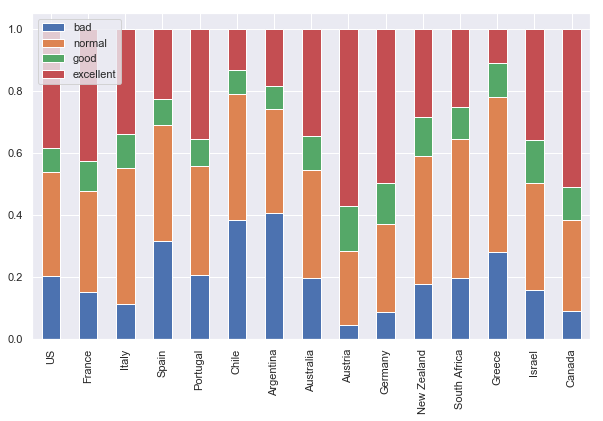

In [734]:
country_points_new.plot(y='Ratio',kind='bar',figsize=(10,6),stacked=True)

In [735]:
country_points_new

Ratio                              
                   bad    normal      good excellent
US            0.204877  0.333799  0.077099  0.384225
France        0.152650  0.325672  0.096679  0.424999
Italy         0.113137  0.439194  0.107900  0.339770
Spain         0.317450  0.372022  0.085319  0.225210
Portugal      0.206682  0.351750  0.087359  0.354209
Chile         0.383725  0.405251  0.076647  0.134377
Argentina     0.405564  0.336567  0.072840  0.185029
Australia     0.197950  0.346014  0.112073  0.343964
Austria       0.047631  0.235635  0.146673  0.570060
Germany       0.089088  0.281574  0.131664  0.497674
New Zealand   0.177332  0.412105  0.125675  0.284888
South Africa  0.198268  0.446217  0.102552  0.252963
Greece        0.280702  0.499325  0.110661  0.109312
Israel        0.159396  0.343960  0.137584  0.359060
Canada        0.091241  0.291971  0.105839  0.510949

In [739]:
wine.price.describe()

count    156684.000000
mean         34.678168
std          39.941498
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [743]:
wine[wine.price>1000]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title,num
10651,Austria,"Wet earth, rain-wet stones, damp moss, wild sa...",Ried Loibenberg Smaragd,94,1100.0,Wachau,NaN,NaN,Grüner Veltliner,Emmerich Knoll,NaN,NaN,NaN,1400.0
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair,NaN,NaN,NaN,8862.0
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug,NaN,NaN,NaN,3484.0
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour,NaN,NaN,NaN,6168.0
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux,NaN,NaN,NaN,6168.0
34927,France,"Such a generous and ripe wine, with a dark cor...",NaN,97,1100.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion,NaN,NaN,NaN,6168.0
34939,France,"The purest Cabernet Sauvignon fruit, with dark...",NaN,96,1300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Mouton Rothschild,NaN,NaN,NaN,6168.0
34942,France,"Solid, very structured, packed with dense and ...",NaN,96,1200.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion,NaN,NaN,NaN,6168.0
166770,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Pétrus,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,6168.0
216282,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Pétrus,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,6168.0


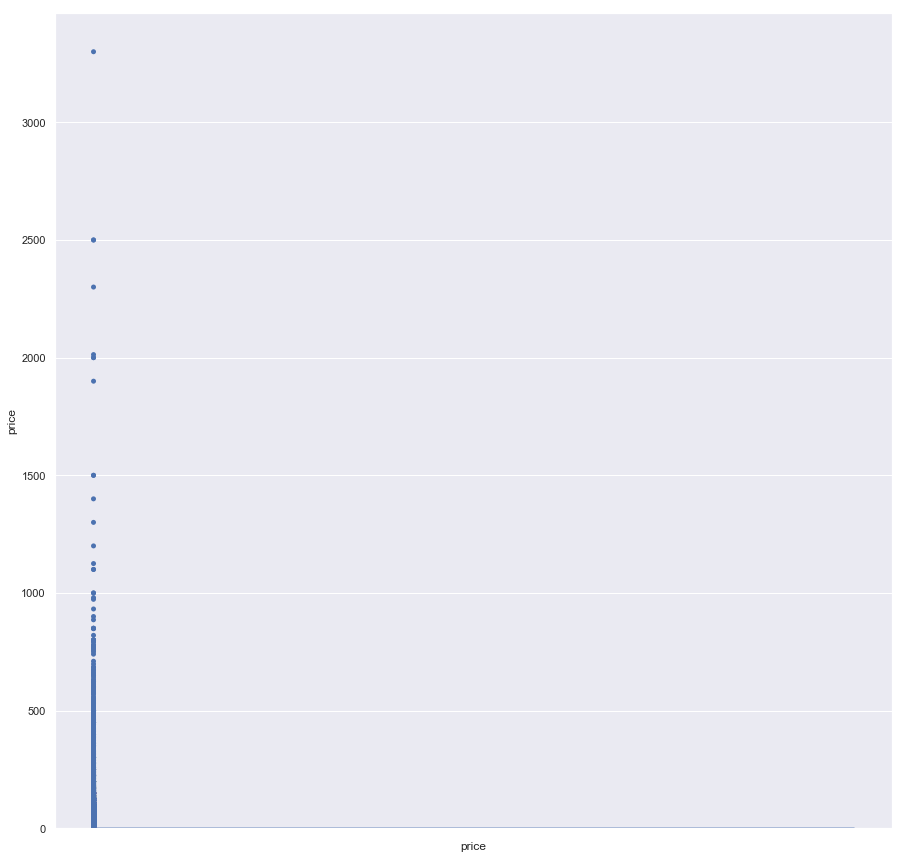

In [756]:
plt.figure(figsize=(15,15))
sns.stripplot(y='price',data=wine)


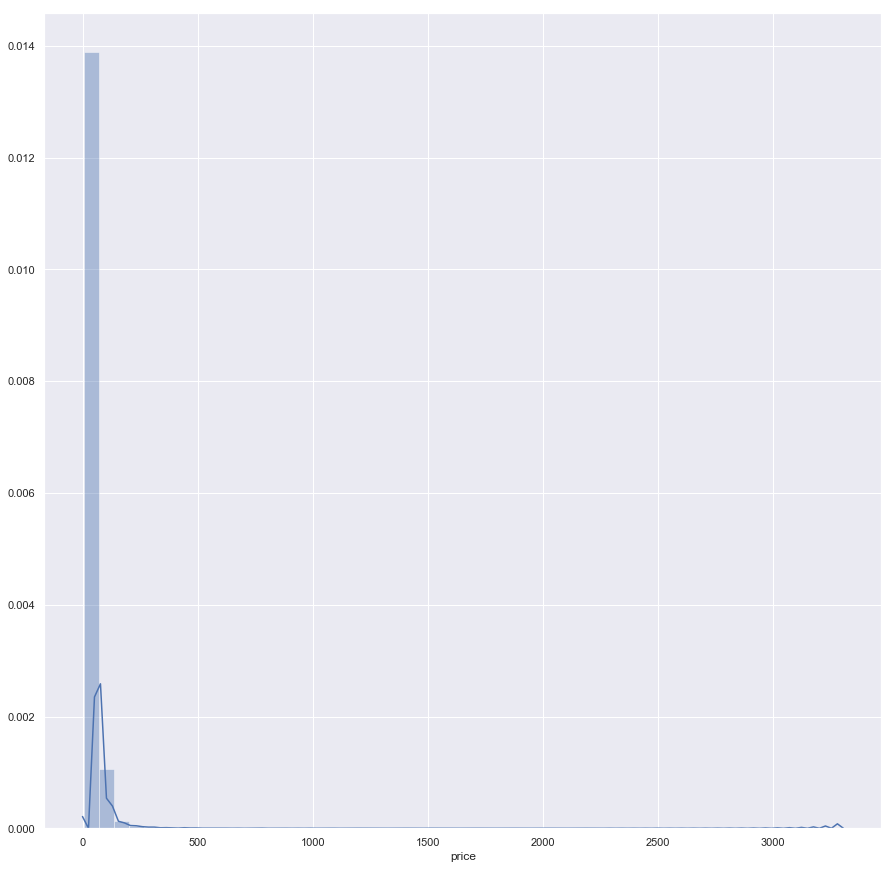

In [757]:
plt.figure(figsize=(15,15))
sns.distplot(wine.price.dropna())

In [767]:
high_price=wine[wine.price>=1000][['country','province','designation','points','variety','price']].sort_values(by='price')
high_price.plot(kind='bar',x='variety',y='price')

In [768]:
high_price

,country,province,designation,points,variety,price
35531,France,Bordeaux,NaN,94,Bordeaux-style White Blend,1000.0
187461,Portugal,Port,90-year Old Tawny,97,Port,1000.0
34927,France,Bordeaux,NaN,97,Bordeaux-style Red Blend,1100.0
10651,Austria,Wachau,Ried Loibenberg Smaragd,94,Grüner Veltliner,1100.0
264511,France,Burgundy,NaN,94,Pinot Noir,1125.0
34942,France,Bordeaux,NaN,96,Bordeaux-style Red Blend,1200.0
34939,France,Bordeaux,NaN,96,Bordeaux-style Red Blend,1300.0
26296,France,Champagne,Clos du Mesnil,100,Chardonnay,1400.0
262683,France,Bordeaux,NaN,100,Bordeaux-style Red Blend,1500.0
262685,France,Bordeaux,NaN,100,Bordeaux-style Red Blend,1500.0


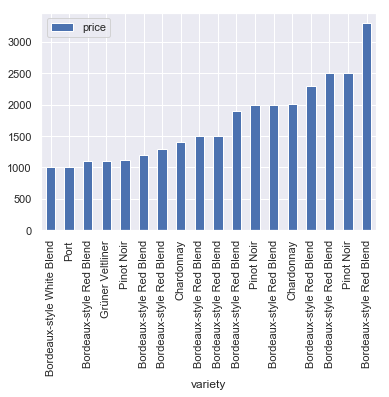

In [790]:
最顶级的葡萄酒种类为：Bordeaux-style Red Blend、Pinot Noir、Chardonnay、Grüner Veltliner、Port和Bordeaux-style White Blend
法国Bordeaux盛产顶级葡萄酒，主要是以Bordeaux命名的两类葡萄酒：Bordeaux-style Red Blend、Bordeaux-style White Blend
顶级葡萄酒的评分除一项外均在90分以上，证明其品质优秀，也说明了”贵的有道理“
价格最高（3300）的葡萄酒评分反而低于90，一方面可能是其本身质量不够好，也有可能是因其定价远超出其质量导致了低分效应

35531                         NaN
187461          90-year Old Tawny
34927                         NaN
10651     Ried Loibenberg Smaragd
264511                        NaN
34942                         NaN
34939                         NaN
26296              Clos du Mesnil
262683                        NaN
262685                        NaN
34922                         NaN
264494                        NaN
216282                        NaN
13318         Roger Rose Vineyard
34920                         NaN
166770                        NaN
249310                        NaN
231220                        NaN
Name: designation, dtype: object

In [817]:
a=wine[['points','price']].corr()
print('价格和评分的整体相关性系数为%.4f'%(a[0:1]['price']))
b=wine[wine.price<100][['points','price']].corr()
print('单价为100以下的葡萄酒价格和评分的相关性系数为%.4f'%(b[0:1]['price']))


价格和评分的整体相关性系数为0.4270
单价为100以下的葡萄酒价格和评分的相关性系数为0.5501


In [815]:
a[0:1]['price']

points    0.426987
Name: price, dtype: float64

In [801]:
wine[wine.price<100][['points','price']].corr()

,points,price
points,1.000000,0.550075
price,0.550075,1.000000


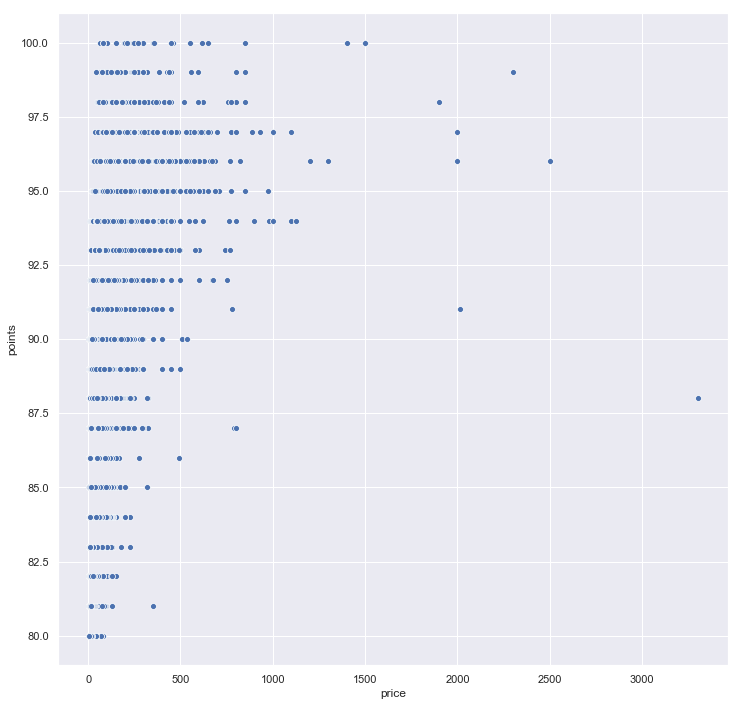

In [819]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='price',y='points',data=wine)

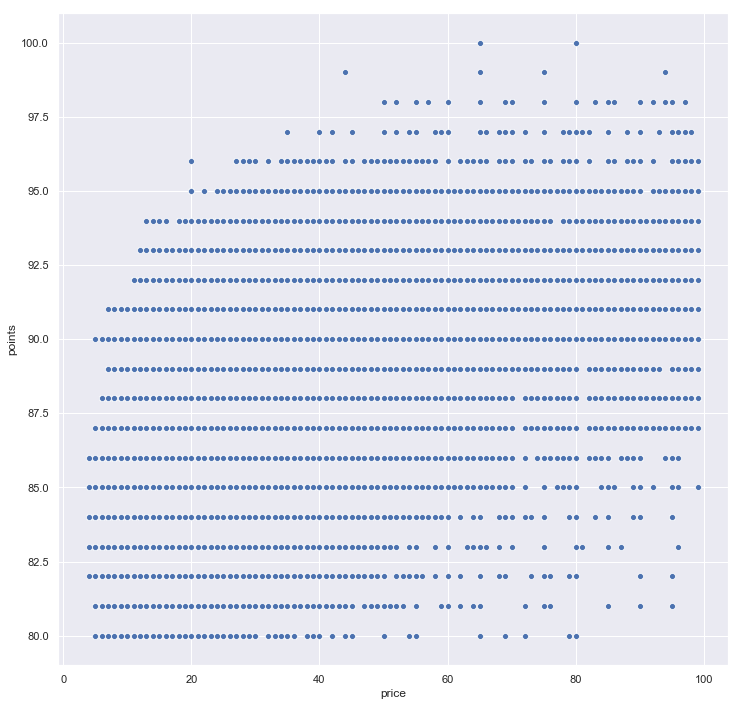

In [820]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='price',y='points',data=(wine[wine.price<100][['points','price']]))

<Figure size 864x864 with 0 Axes>

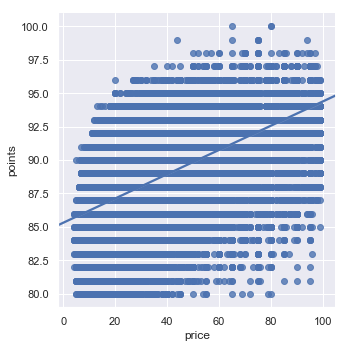

In [821]:
plt.figure(figsize=(12,12))
sns.lmplot(x='price',y='points',data=(wine[wine.price<100][['points','price']]))

In [839]:
from sklearn import linear_model #导入机器学习库中的线性回归方法
x=np.array(wine[wine.price<100]['price']).reshape(151615,1)
y=np.array(wine[wine.price<100]['points']).reshape(151615,1)


In [872]:
#建立回归模型
model=linear_model.LinearRegression()
model.fit(x,y)
#获取模型
coef=float(model.coef_) #获取自变量系数
model_intercept=float(model.intercept_)#获取截距
print('线性回归方程为：','\n','y=’{}*x+{}'.format(coef,model_intercept))

线性回归方程为： 
 y=’0.09049410732545735*x+85.31720477037071


In [968]:
#生成新表来记录性价比高的葡萄酒
wine_good=wine
wine_good['points_new']=coef*wine_good.price+model_intercept
wine_good=wine[wine_good.points>wine_good.points_new].reset_index(drop=True)

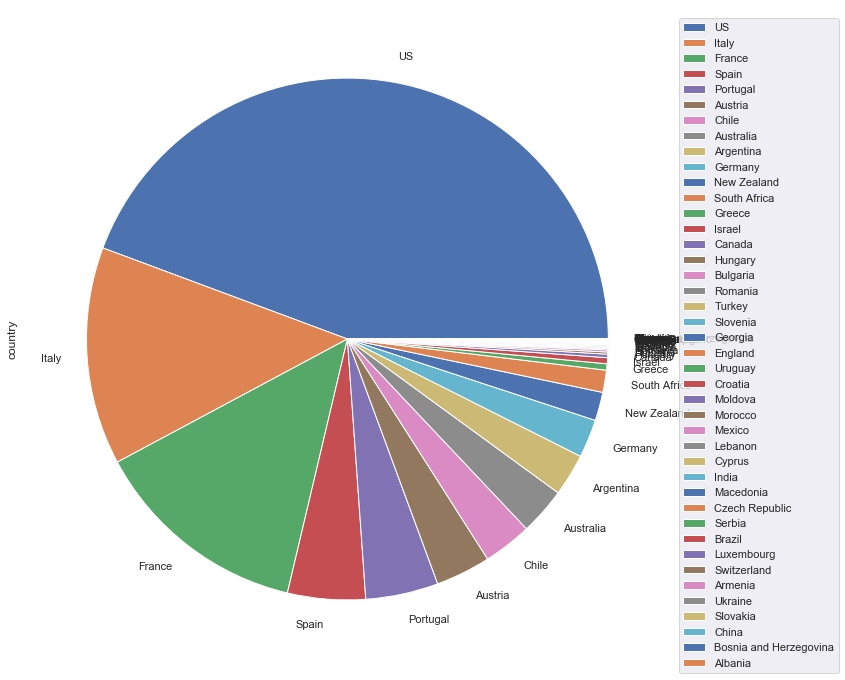

In [978]:
wine_good.country.value_counts().plot(kind='pie',figsize=(12,12))
plt.legend(bbox_to_anchor=(1,1))  #将图例设置在图片外

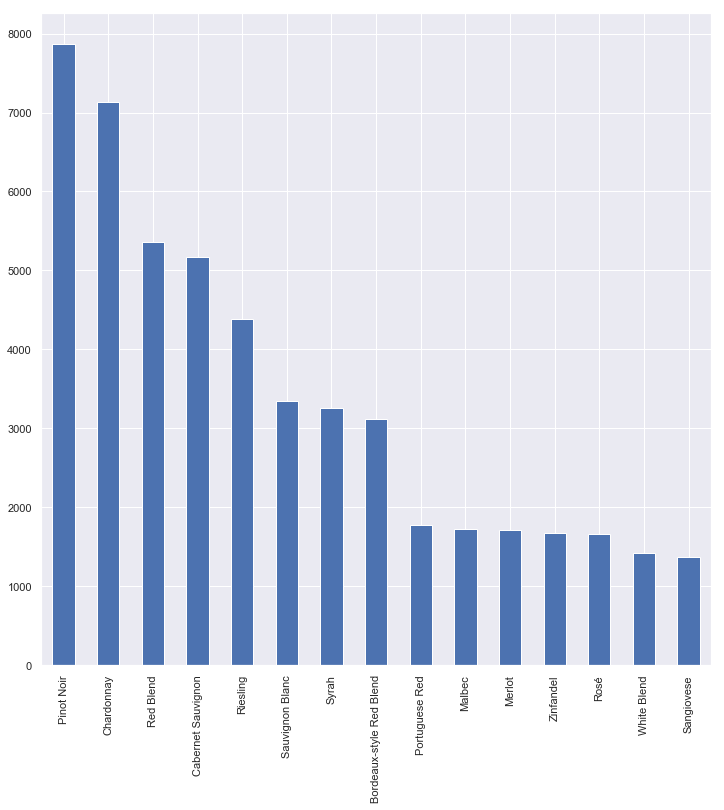

In [985]:
wine_good.variety.value_counts()[0:15].plot(kind='bar',figsize=(12,12))

In [986]:
wine_good.variety.value_counts()[0:15]

Pinot Noir                  7869
Chardonnay                  7131
Red Blend                   5361
Cabernet Sauvignon          5166
Riesling                    4387
Sauvignon Blanc             3347
Syrah                       3254
Bordeaux-style Red Blend    3113
Portuguese Red              1772
Malbec                      1723
Merlot                      1712
Zinfandel                   1669
Rosé                        1659
White Blend                 1421
Sangiovese                  1373
Name: variety, dtype: int64

In [1008]:
temp=wine_good[(wine_good.variety=='Pinot Noir')|(wine_good.variety=='Chardonnay')|(wine_good.variety=='Bordeaux-style Red Blend')]


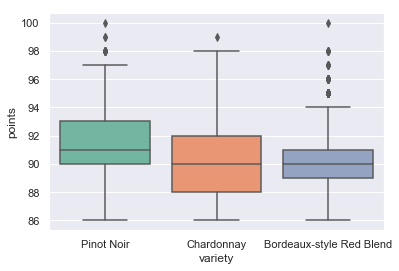

In [1015]:
sns.boxplot(x="variety", y="points",data=temp,palette="Set2")

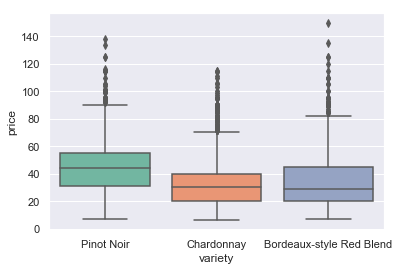

In [1016]:
sns.boxplot(x="variety", y="price",data=temp,palette="Set2")

In [1011]:
temp[['points','price','variety']].groupby(by='variety').describe()

points                                               \
                           count       mean       std   min   25%   50%   75%   
variety                                                                         
Bordeaux-style Red Blend  3113.0  90.232252  2.048189  86.0  89.0  90.0  91.0   
Chardonnay                7131.0  90.274576  2.163330  86.0  88.0  90.0  92.0   
Pinot Noir                7869.0  91.269157  2.085852  86.0  90.0  91.0  93.0   

                                  price                                   \
                            max   count       mean        std  min   25%   
variety                                                                    
Bordeaux-style Red Blend  100.0  3113.0  33.517507  18.026877  7.0  20.0   
Chardonnay                 99.0  7131.0  32.297013  16.176737  6.0  20.0   
Pinot Noir                100.0  7869.0  43.481764  16.719670  7.0  31.0   

                                             
                           50%   75%    max  
variety                                      
Bordeaux-style Red Blend  29.0  45.0  150.0  
Chardonnay                30.0  40.0  115.0  
Pinot Noir                44.0  55.0  138.0

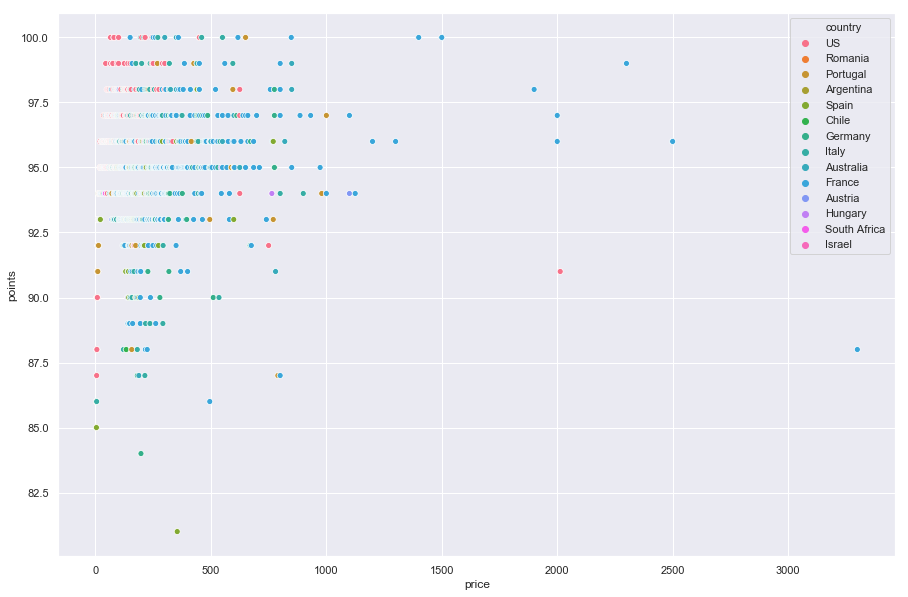

In [1205]:
#确定每个价格段的评分最高的10个葡萄酒
temp=list(wine.groupby('price').points.nlargest(5).to_frame().reset_index().level_1)
#创建新表作为葡萄酒推荐库
wine_recommend=wine.loc[temp].reset_index(drop=True)

plt.figure(figsize=(15, 10))
sns.scatterplot(y='points',x='price',hue='country',data=wine_recommend)


In [1208]:
print('请输入您的葡萄酒预期价格：')
a=float(input(''))
# 如果价格正好有
if a in list(wine_recommend.price):
    temp=wine_recommend[wine_recommend.price==a]
    for i in list(temp.index):
      if temp.loc[i].designation:    #如果有葡萄酒名字
        print('为您推荐：来自%s的%s种类的%s葡萄酒，价格为%.1f，得分为%.1f。'%(temp.loc[i].country,temp.loc[i].variety,temp.loc[i].designation,temp.loc[i].price,temp.loc[i].points))
      else:
        print('为您推荐：来自%s的%s类葡萄酒，价格为%.1f，得分为%.1f。'%(temp.loc[i].country,temp.loc[i].variety,temp.loc[i].price,temp.loc[i].points))
#如果价格没有，则不推荐（其实这里也应该推荐价格低一些的，但是懒得写了！）
else:
    print('没有合适的价格，请重新输入')
                        
                        
                        


请输入您的葡萄酒预期价格：
2
没有合适的价格，请重新输入


In [1183]:
wine_recommend.price.value_counts()

767.0     1
162.0     1
142.0     1
144.0     1
146.0     1
148.0     1
150.0     1
152.0     1
154.0     1
156.0     1
158.0     1
160.0     1
164.0     1
138.0     1
166.0     1
168.0     1
170.0     1
172.0     1
174.0     1
176.0     1
178.0     1
180.0     1
182.0     1
184.0     1
140.0     1
136.0     1
190.0     1
119.0     1
109.0     1
110.0     1
         ..
886.0     1
187.0     1
189.0     1
159.0     1
157.0     1
1125.0    1
2300.0    1
129.0     1
261.0     1
131.0     1
569.0     1
133.0     1
273.0     1
135.0     1
137.0     1
289.0     1
139.0     1
141.0     1
155.0     1
303.0     1
143.0     1
145.0     1
319.0     1
147.0     1
149.0     1
345.0     1
151.0     1
153.0     1
357.0     1
4.0       1
Name: price, Length: 415, dtype: int64

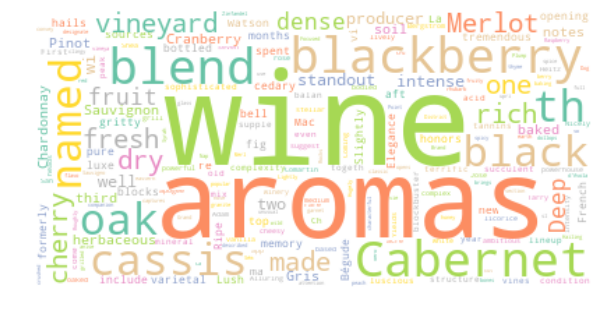

In [1220]:
from wordcloud import WordCloud
wc=WordCloud(background_color="white", max_words=200, colormap="Set2")

#略过了创建停用词库进行数据清洗的环节
words=wine.description
wc.generate(''.join(str(words)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1425]:
#只为拥有数量在100之上的种类创建词频库
temp=wine.variety.value_counts()
temp=temp[temp>100].to_frame().reset_index()
temp=temp.drop(labels='variety',axis=1)
temp.columns=['variety']

#用inner联结的方式创建新表
wine_words=pd.merge(wine,temp,on='variety')
temp1=wine_words.groupby(by='variety').description.apply(lambda x:''.join(str(x)))
#创建一个dataframe，列名为种类，值为种类的关键词（其实应该为每一个种类创建词频库，我只是在偷懒）
wine_keys=pd.DataFrame()
for variety_name in temp1.index:
    words=temp1[variety_name].lower().split()[1:]
    a=dict()
    for word in words:
        if word not in a:
            a[word] = 1
        else:
            a[word] = a[word] + 1
    #对字典键值（出现频次）排序，返回出现频次最高的30个关键词,并更新在词频库中
    a=pd.Series(a)
    a=a.sort_values(ascending=False)[0:30]
    wine_keys[variety_name]=list(a.index)
#词频库中存在大量的停用词，我没有处理的

#词频库的反馈规则为：1、如果某个词没有出现，则认为无法判断；
#                2、如果某个词在超过10个种类中出现，则认为无法判断；
#               3、如果某个词在小于10个种类中出现，则返回排名最高的那五个类；
#反馈规则也有很大问题，不再深究了

print('请输入一个关键词：')
keywords=input()

#创建一个字典（再转化成dataframe）记录所属关键词所属的种类，以及索引。如果种类数小于10，则返回索引最小的那几个种类
a=dict()
for variety_name in list(wine_keys.columns):
    if (wine_keys[variety_name]==keywords).sum()==1:
        a[variety_name]=(wine_keys[variety_name]==keywords).idxmax()
a=pd.Series(a)
if a.shape[0]>10:
    print('信息不足，无法判断')
else:
    b=a.sort_values()[0:5]
    print('根据您输入的信息，为您推荐相关的葡萄酒种类：')
    for aaa in list(b.index):
        print(aaa)

请输入一个关键词
sauvignon
根据您输入的信息，为您推荐相关的葡萄酒种类：
Cabernet Sauvignon-Syrah
Cabernet Blend
Fumé Blanc
Sauvignon
Sémillon


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

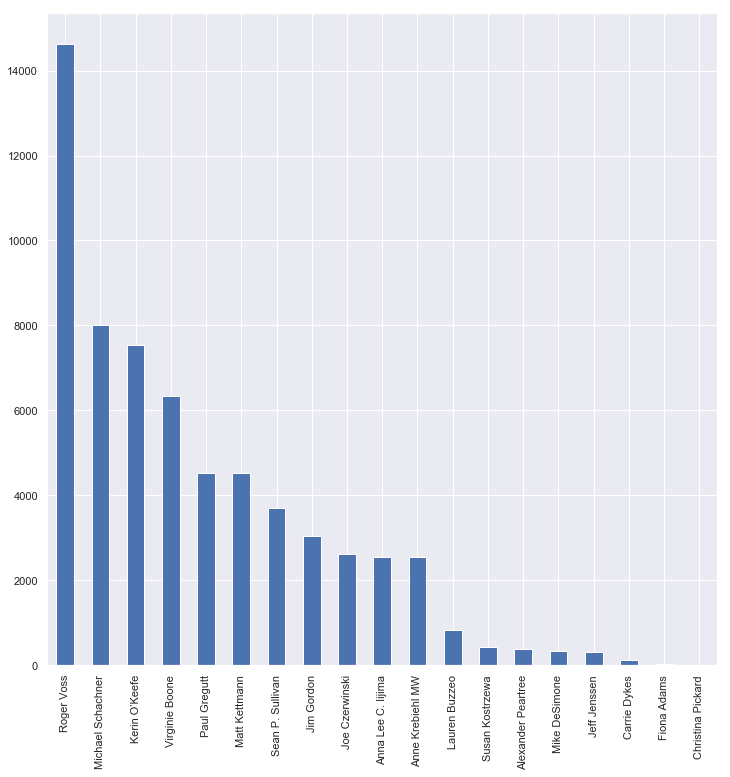

In [1431]:
wine.taster_name.value_counts().plot(kind='bar',figsize=(12,12))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

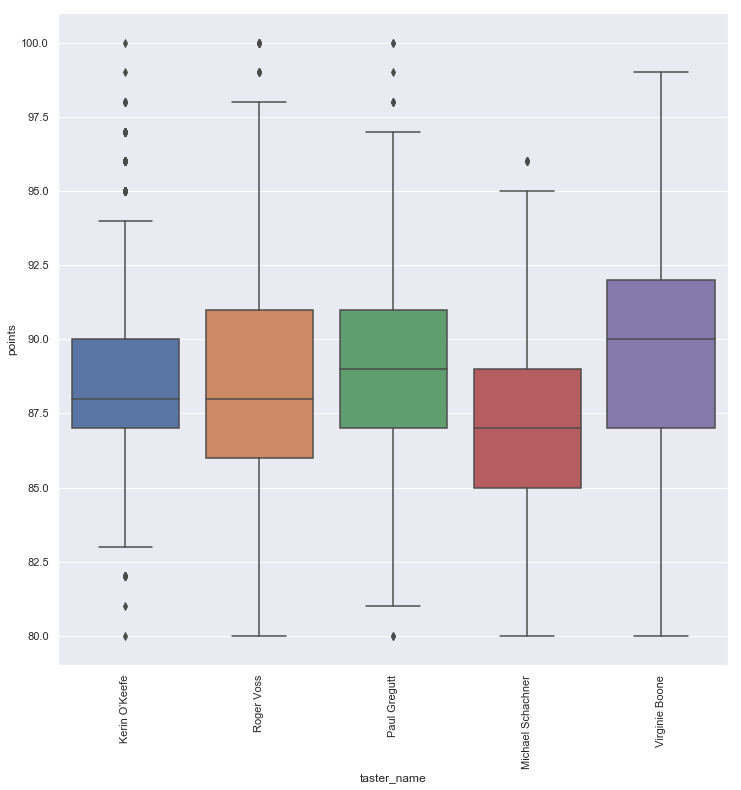

In [1449]:
plt.figure(figsize=(12,12))
wine_taster=wine[(wine.taster_name=='Roger Voss')|(wine.taster_name=='Michael Schachner')|(wine.taster_name=='Kerin O’Keefe')|(wine.taster_name=='Virginie Boone')|(wine.taster_name=='Paul Gregutt')]
sns.boxplot(y='points',x='taster_name',data=wine_taster)
plt.xticks(rotation=90)

In [1457]:
wine.groupby('taster_name').price.describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Roger Voss,12235.0,38.493829,76.445324,5.0,15.00,22.0,40.0,3300.0
Michael Schachner,7895.0,25.692337,27.136621,4.0,13.00,18.0,27.0,600.0
Kerin O’Keefe,6902.0,41.923645,37.803933,7.0,20.00,30.0,50.0,595.0
Virginie Boone,6308.0,49.516328,34.949345,9.0,28.00,40.0,60.0,625.0
Paul Gregutt,4503.0,34.881412,20.062711,6.0,20.00,30.0,45.0,275.0
Matt Kettmann,4442.0,38.753940,21.029162,7.0,25.00,36.0,48.0,750.0
Sean P. Sullivan,3677.0,34.583900,20.477112,6.0,20.00,30.0,42.0,240.0
Jim Gordon,3042.0,26.750822,17.111999,4.0,15.00,23.0,32.0,220.0
Anna Lee C. Iijima,2533.0,30.277142,38.048627,6.0,16.00,22.0,34.0,775.0


In [1669]:
#创建一个表，收集每个品鉴师品鉴最多的五个种类
temp=wine.groupby('taster_name').variety.value_counts().to_frame()
temp.columns=['num']
temp=temp.reset_index(level='variety')

taster_variety=pd.DataFrame()
for aaa in temp.index:
    taster_variety[aaa]=list(temp.loc[aaa].variety[0:5])
taster_variety=taster_variety.T
taster_variety=taster_variety.reset_index()
taster_variety.columns=[['taster_name','variety1','variety2','variety3','variety4','variety5']]

#创建一个表，收集品鉴师的联系方式，该表按照品鉴师资深程度排列
link=wine[['taster_name','taster_twitter_handle']].dropna().drop_duplicates()
namelist=list(wine.taster_name.value_counts().index)

name_link=pd.DataFrame(dict(zip(namelist,namelist)),index=['taster_twitter_handle'])
for aaa in namelist:
    if aaa in list(link.taster_name):
        name_link[aaa]=list(link[link.taster_name==aaa].taster_twitter_handle)[0]
    else:
        name_link[aaa]='@'
name_link=name_link.T.reset_index()
name_link.columns=[['taster_name','taster_twitter_handle']]

#联结两表
taster_info=pd.merge(name_link,taster_variety)

ValueError: The column label 'taster_name' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [1675]:
taster_info

,taster_name,taster_twitter_handle,variety1,variety2,variety3,variety4,variety5
0,Roger Voss,@vossroger,Bordeaux-style Red Blend,Chardonnay,Portuguese Red,Rosé,Pinot Noir
1,Michael Schachner,@wineschach,Malbec,Red Blend,Cabernet Sauvignon,Tempranillo,Chardonnay
2,Kerin O’Keefe,@kerinokeefe,Red Blend,Nebbiolo,Sangiovese,Glera,White Blend
3,Virginie Boone,@vboone,Pinot Noir,Cabernet Sauvignon,Chardonnay,Zinfandel,Sauvignon Blanc
4,Paul Gregutt,@paulgwine,Pinot Noir,Chardonnay,Pinot Gris,Syrah,Riesling
5,Matt Kettmann,@mattkettmann,Pinot Noir,Chardonnay,Syrah,Cabernet Sauvignon,Red Blend
6,Sean P. Sullivan,@wawinereport,Cabernet Sauvignon,Syrah,Bordeaux-style Red Blend,Red Blend,Chardonnay
7,Jim Gordon,@gordone_cellars,Pinot Noir,Red Blend,Zinfandel,Chardonnay,Cabernet Sauvignon
8,Joe Czerwinski,@JoeCz,Pinot Noir,Shiraz,Chardonnay,Rhône-style Red Blend,Sauvignon Blanc
9,Anna Lee C. Iijima,@,Riesling,Chardonnay,Cabernet Franc,Pinot Noir,Rosé


In [ ]:
数量最多的葡萄酒种类有Pinot Noir 、Chardonnay 、Cabernet Sauvignon等等。
US、France、Italy、Spain都是葡萄酒大国，前四者的葡萄酒种类数量超过了总市场75%的份额。


Canada、Austria虽然不是不是葡萄酒的盛产国，但其平均分治较高，而且低分葡萄酒较少，表明这些国家的葡萄酒质量有一定的保障，但没有绝佳的葡萄酒产品；
US、France作为葡萄酒大国，均分处在中等水平，同时存在绝佳的葡萄酒（满分产品）以及质量较差的葡萄酒（最低分产品），葡萄酒整体质量尚可，
Spain作为葡萄酒第二大国，均分较低，也不存在绝佳的葡萄酒产品，整体质量有待提高。

Canada、Austria、Germany表现良好，Chile、Argentina
、Greece表现较差，这与前文中分析的结论是一致的；
葡萄酒大国中US、France比较优秀，Spain表现有待提升，这与前文中分析的结论也是一致的。

根据葡萄酒的价格分布可知：

葡萄酒价格一般在0~100之间，超过500以上的可认为是高端酒类，超过1000以上则是顶级奢华酒类。


可以得到以下结论：

最顶级的葡萄酒种类为：Bordeaux-style Red Blend、Pinot Noir、Chardonnay、Grüner Veltliner、Port和Bordeaux-style White Blend；
法国Bordeaux盛产顶级葡萄酒，主要是以Bordeaux命名的两类葡萄酒：Bordeaux-style Red Blend、Bordeaux-style White Blend；
顶级葡萄酒的评分除一项外均在90分以上，证明其品质优秀，也说明了“贵的有道理”；
价格最高（3300）的葡萄酒评分反而低于90，一方面可能是其本身质量不够好，也有可能是因其定价远超出其质量导致了低分效应。



单价为100以下的葡萄酒价格和评分的相关性系数为 0.5501，可以认为价格和评分有一定的正相关关系；
单价在100以上后，价格和评分的相关性减弱，有可能是这些商品的定价因素有很多的其他附属价值，而不是单纯的葡萄酒质量。

与前文分析对比可知：

US、France、Italy、Spain都是葡萄酒大国，US无论是葡萄酒数量还是高性价比葡萄酒数量都稳居榜首；
France虽然葡萄酒数量占比比Italy更高，但是性价比方面却落后于Italy，这可能是因为France擅产顶级奢侈葡萄酒，而Italy把市场瞄准在中端市场。


含有较多高性价比葡萄酒的种类有：Pinot Noir、Chardonnay、Red Blend 、Cabernet Sauvignon、Riesling等，而这几类本身也是市场占有率较高的几类；
同时含有顶级奢侈酒的种类有：Pinot Noir、Chardonnay、Bordeaux-style Red Blend。


创建葡萄酒推荐库，当用户输入预期价格时，会自动推荐性价比最高的葡萄酒（也可以创建库让用户可以输入国家或者种类等信息，这里没有拓展）：


创建不同种类葡萄酒的词频库

从表中数据可以看出：

Roger Voss作为最资深的葡萄酒品鉴专家，品鉴种类相当广泛，涵盖低中高市场，同时拥有对最顶级奢华葡萄酒（价格为3300）的品鉴经验；
Kerin O’Keefe和Virginie Boone则主要受到中高端葡萄酒商家的青睐，品鉴的葡萄酒均价为分别为41.9和49.5，评分也比较集中在一般和良好之间；
Michael Schachner则主要瞄准中低端市场，品鉴的葡萄酒均价为25.69，相应的葡萄酒评分较低。
Kerin O’Keefe和Virginie Boone同为中高端市场的品鉴专家，评分上面却存在较大差异，这可能是由于Kerin O’Keefe较为严苛所致，对此还可以进一步进行佐证的是：Paul Gregutt品鉴的葡萄酒价格整体较Kerin O’Keefe更低，但是整体评分却比Kerin O’Keefe的更高。

提供了一个品鉴师名录，按照资深程度排序，显示该品鉴师的联系方式，以及品鉴最多的五类葡萄酒。


